<a href="https://colab.research.google.com/github/rogalag/colab_pix2pix/blob/master/Copy_of_vid2vid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab notebook or tutorial
### [How to run PyTorch with GPU and CUDA 9.2 support on Google Colab](https://www.dlology.com/blog/how-to-run-pytorch-with-gpu-and-cuda-92-support-on-google-colab/)

In [0]:
!python --version

Python 3.6.3
/bin/bash: nvcc: command not found


In [0]:
!cat /etc/*-release

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=17.10
DISTRIB_CODENAME=artful
DISTRIB_DESCRIPTION="Ubuntu 17.10"
NAME="Ubuntu"
VERSION="17.10 (Artful Aardvark)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 17.10"
VERSION_ID="17.10"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=artful
UBUNTU_CODENAME=artful


## Install [Cuda 9.2](https://developer.nvidia.com/cuda-downloads?target_os=Linux&target_arch=x86_64&target_distro=Ubuntu&target_version=1710&target_type=deblocal)

In [0]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod2/local_installers/cuda-repo-ubuntu1710-9-2-local_9.2.148-1_amd64


Redirecting output to ‘wget-log’.


In [0]:
!ls

cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb  sample_data  wget-log
cuda-repo-ubuntu1710-9-2-local_9.2.148-1_amd64	    vid2vid	 wget-log.1


In [0]:
!dpkg -i cuda-repo-ubuntu1710-9-2-local_9.2.148-1_amd64

Selecting previously unselected package cuda-repo-ubuntu1710-9-2-local.
(Reading database ... 88075 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1710-9-2-local_9.2.148-1_amd64 ...
Unpacking cuda-repo-ubuntu1710-9-2-local (9.2.148-1) ...
Setting up cuda-repo-ubuntu1710-9-2-local (9.2.148-1) ...


In [0]:
!ls /var/ | grep cuda-repo

cuda-repo-9-0-local
cuda-repo-9-2-local


In [0]:
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub

OK


In [0]:
!apt-get update

Get:1 file:/var/cuda-repo-9-0-local  InRelease
Ign:1 file:/var/cuda-repo-9-0-local  InRelease
Get:2 file:/var/cuda-repo-9-2-local  InRelease
Ign:2 file:/var/cuda-repo-9-2-local  InRelease
Get:3 file:/var/cuda-repo-9-0-local  Release [574 B]
Get:4 file:/var/cuda-repo-9-2-local  Release [574 B]
Get:3 file:/var/cuda-repo-9-0-local  Release [574 B]
Get:4 file:/var/cuda-repo-9-2-local  Release [574 B]
Get:5 file:/var/cuda-repo-9-2-local  Release.gpg [801 B]
Get:5 file:/var/cuda-repo-9-2-local  Release.gpg [801 B]
Hit:6 http://archive.ubuntu.com/ubuntu artful InRelease
Hit:7 http://archive.ubuntu.com/ubuntu artful-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu artful-backports InRelease
Hit:10 http://security.ubuntu.com/ubuntu artful-security InRelease
Get:11 file:/var/cuda-repo-9-2-local  Packages [18.8 kB]
Reading package lists... Done


In [0]:
!apt-get install cuda

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-9-0 cuda-command-line-tools-9-0 cuda-core-9-0 cuda-cublas-9-0
  cuda-cublas-dev-9-0 cuda-cudart-9-0 cuda-cudart-dev-9-0 cuda-cufft-9-0
  cuda-cufft-dev-9-0 cuda-curand-9-0 cuda-curand-dev-9-0 cuda-cusolver-9-0
  cuda-cusolver-dev-9-0 cuda-cusparse-9-0 cuda-cusparse-dev-9-0
  cuda-demo-suite-9-0 cuda-documentation-9-0 cuda-driver-dev-9-0
  cuda-libraries-9-0 cuda-libraries-dev-9-0 cuda-license-9-0
  cuda-misc-headers-9-0 cuda-npp-9-0 cuda-npp-dev-9-0 cuda-nvgraph-9-0
  cuda-nvgraph-dev-9-0 cuda-nvml-dev-9-0 cuda-nvrtc-9-0 cuda-nvrtc-dev-9-0
  cuda-runtime-9-0 cuda-samples-9-0 cuda-toolkit-9-0 cuda-visual-tools-9-0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  cuda-9-2 cuda-command-line-tools-9-2 cuda-compiler-9-2 cuda-cublas-9-2
  cuda-cublas-dev-9-2 cuda-cudart

## Install [PyTorch](https://pytorch.org/) with Cuda 9.2 support

In [0]:
!pip install http://download.pytorch.org/whl/cu92/torch-0.4.1-cp36-cp36m-linux_x86_64.whl 
!pip install torchvision

## Get the [Vid2vid](https://github.com/NVIDIA/vid2vid) project
Pytorch implementation of our method for high-resolution (e.g. 2048x1024) photorealistic video-to-video translation.

In [0]:
!git clone https://github.com/NVIDIA/vid2vid

Cloning into 'vid2vid'...
remote: Counting objects: 754, done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 754 (delta 8), reused 10 (delta 4), pack-reused 733
Receiving objects: 100% (754/754), 133.70 MiB | 24.38 MiB/s, done.
Resolving deltas: 100% (143/143), done.


In [0]:
import os
os.chdir('./vid2vid')

In [0]:
!pip install dominate requests

  Running setup.py bdist_wheel for dominate ... - done
  Stored in directory: /root/.cache/pip/wheels/86/7c/76/a514f343c9e4f85f4c98fe13138ab9c8f756647155c4c1f25e
Successfully built dominate


In [0]:
!python scripts/download_flownet2.py

running install
running bdist_egg
running egg_info
writing correlation_cuda.egg-info/PKG-INFO
writing dependency_links to correlation_cuda.egg-info/dependency_links.txt
writing top-level names to correlation_cuda.egg-info/top_level.txt
reading manifest file 'correlation_cuda.egg-info/SOURCES.txt'
writing manifest file 'correlation_cuda.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_ext
building 'correlation_cuda' extension
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -Wstrict-prototypes -g -fdebug-prefix-map=/build/python3.6-sXpGnM/python3.6-3.6.3=. -specs=/usr/share/dpkg/no-pie-compile.specs -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/torch/lib/include -I/usr/local/lib/python3.6/dist-packages/torch/lib/include/TH -I/usr/local/lib/python3.6/dist-packages/torch/lib/include/THC -I/usr/local/cuda/include -I/usr/include

In [0]:
!python scripts/download_models.py

In [0]:
!python test.py --name label2city_2048 --dataroot datasets/Cityscapes/test_A --loadSize 2048 --n_scales_spatial 3 --use_instance --fg --use_single_G

------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
dataroot: datasets/Cityscapes/test_A
dataset_mode: temporal
debug: False
display_id: 0
display_winsize: 512
feat_num: 3
fg: True
fg_labels: [26]
fineSize: 512
gpu_ids: [0]
how_many: 300
input_nc: 3
isTrain: False
label_feat: False
label_nc: 35
loadSize: 2048
load_features: False
load_pretrain: 
max_dataset_size: inf
model: vid2vid
nThreads: 2
n_blocks: 9
n_blocks_local: 3
n_downsample_E: 3
n_downsample_G: 3
n_frames_G: 3
n_gpus_gen: 1
n_local_enhancers: 1
n_scales_spatial: 3
name: label2city_2048
ndf: 64
nef: 32
netE: simple
netG: composite
ngf: 128
no_first_img: False
no_flip: False
norm: batch
ntest: inf
output_nc: 3
phase: test
resize_or_crop: scaleWidth
results_dir: ./results/
serial_batches: False
tf_log: False
use_instance: True
use_real_img: False
use_single_G: True
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
dataset [TestDataset] was created
vid2v

In [0]:
!python scripts/download_models_g1.py

In [0]:
!python test.py --name label2city_1024_g1 --dataroot datasets/Cityscapes/test_A --loadSize 1024 --n_scales_spatial 3 --use_instance --fg --n_downsample_G 2 --use_single_G

------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
dataroot: datasets/Cityscapes/test_A
dataset_mode: temporal
debug: False
display_id: 0
display_winsize: 512
feat_num: 3
fg: True
fg_labels: [26]
fineSize: 512
gpu_ids: [0]
how_many: 300
input_nc: 3
isTrain: False
label_feat: False
label_nc: 35
loadSize: 1024
load_features: False
load_pretrain: 
max_dataset_size: inf
model: vid2vid
nThreads: 2
n_blocks: 9
n_blocks_local: 3
n_downsample_E: 3
n_downsample_G: 2
n_frames_G: 3
n_gpus_gen: 1
n_local_enhancers: 1
n_scales_spatial: 3
name: label2city_1024_g1
ndf: 64
nef: 32
netE: simple
netG: composite
ngf: 128
no_first_img: False
no_flip: False
norm: batch
ntest: inf
output_nc: 3
phase: test
resize_or_crop: scaleWidth
results_dir: ./results/
serial_batches: False
tf_log: False
use_instance: True
use_real_img: False
use_single_G: True
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
dataset [TestDataset] was created
vi

In [0]:
!ls results/label2city_1024_g1/test_latest/images

fake_B_stuttgart_00_000000_000003_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000004_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000005_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000006_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000007_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000008_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000009_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000010_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000011_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000012_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000013_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000014_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000015_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000016_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000017_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000018_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000019_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000020_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000021_leftImg8bit.jpg
fake_B_stuttgart_00_000000_000022_leftImg8bit.jpg


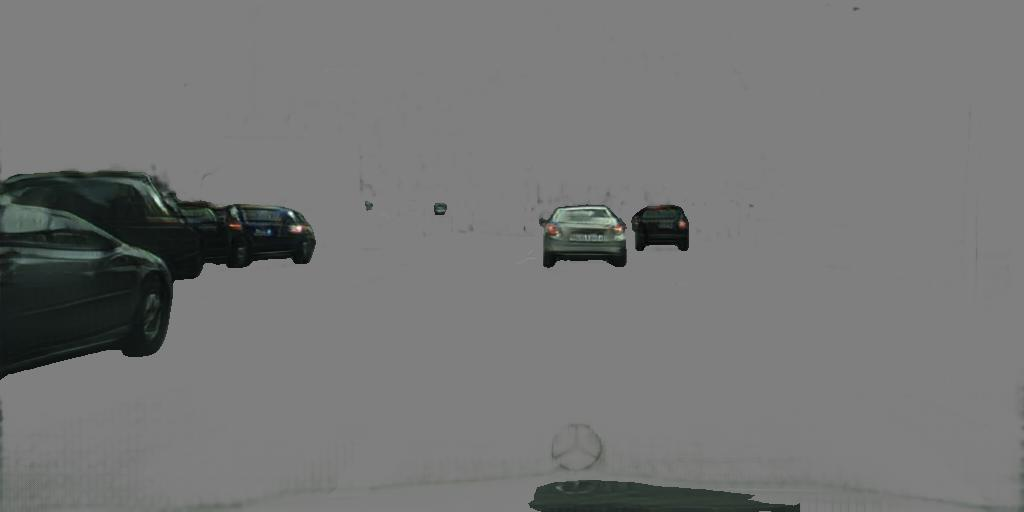

In [0]:
from IPython.display import Image
Image(filename='results/label2city_1024_g1/test_latest/images/fake_B_stuttgart_00_000000_000003_leftImg8bit.jpg') 

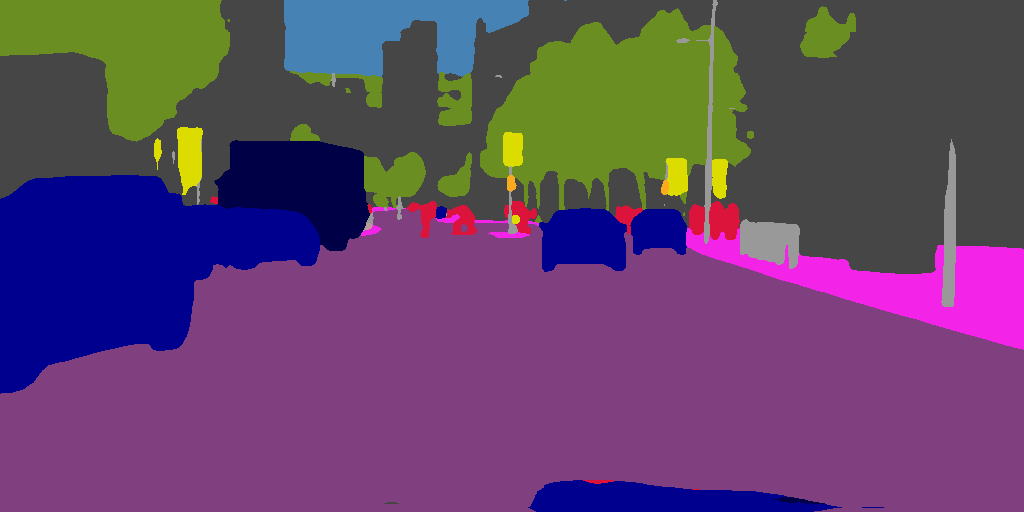

In [0]:
Image(filename='results/label2city_1024_g1/test_latest/images/real_A_stuttgart_00_000000_000003_leftImg8bit.png')

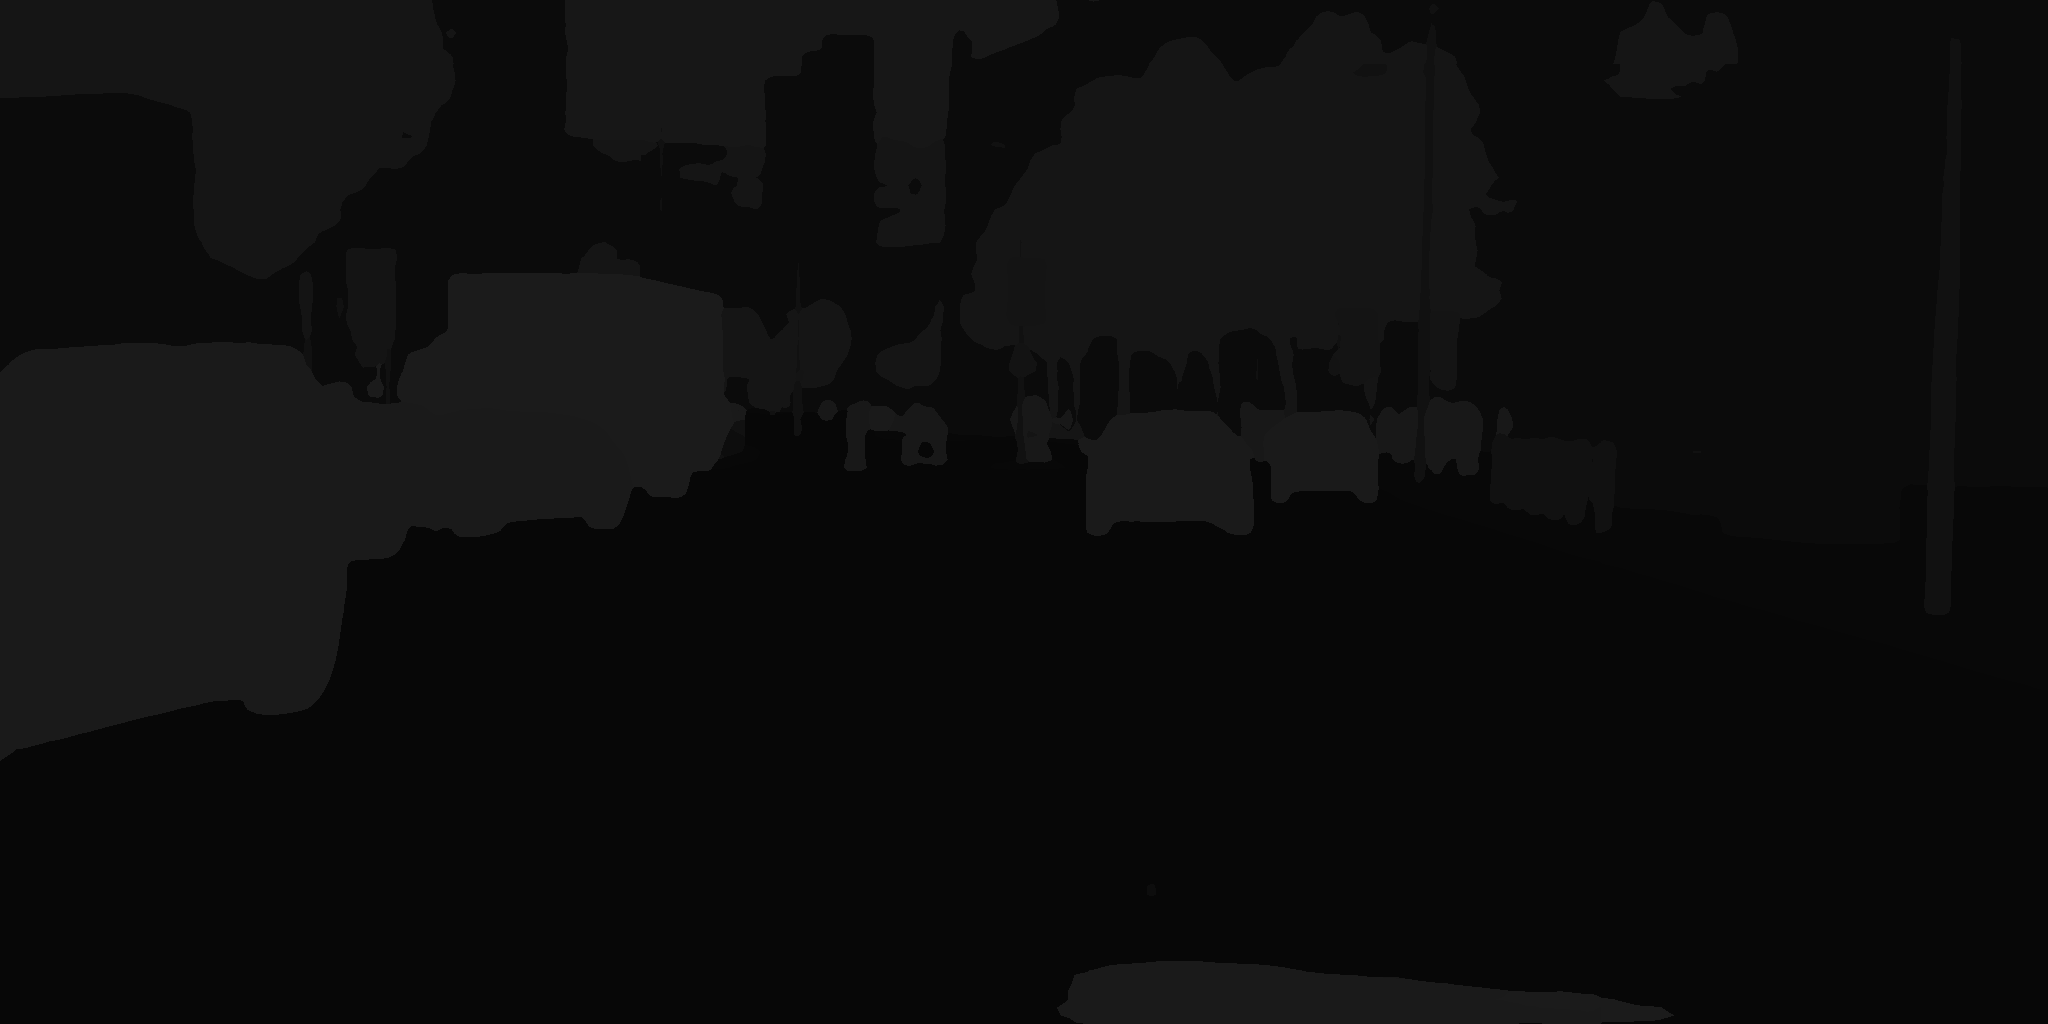

In [0]:
Image(filename='datasets/Cityscapes/test_A/stuttgart_00/stuttgart_00_000000_000003_leftImg8bit.png')

## [CUDA Toolkit 9.0 Downloads](https://developer.nvidia.com/cuda-90-download-archive?target_os=Linux&target_arch=x86_64&target_distro=Ubuntu&target_version=1704&target_type=deblocal) 
You don't have to try.

In [0]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb


Redirecting output to ‘wget-log’.


In [0]:
!ls

cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb  vid2vid
sample_data					    wget-log


In [0]:
!dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb

Selecting previously unselected package cuda-repo-ubuntu1704-9-0-local.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb ...
Unpacking cuda-repo-ubuntu1704-9-0-local (9.0.176-1) ...
Setting up cuda-repo-ubuntu1704-9-0-local (9.0.176-1) ...

The public CUDA GPG key does not appear to be installed.
To install the key, run this command:
sudo apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub



In [0]:
!ls /var/cuda-repo-9-0-local | grep .pub

7fa2af80.pub


In [0]:
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub

OK


In [0]:
!apt-get update

Get:1 file:/var/cuda-repo-9-0-local  InRelease
Ign:1 file:/var/cuda-repo-9-0-local  InRelease
Get:2 file:/var/cuda-repo-9-0-local  Release [574 B]
Get:2 file:/var/cuda-repo-9-0-local  Release [574 B]
Get:3 file:/var/cuda-repo-9-0-local  Release.gpg [819 B]
Get:3 file:/var/cuda-repo-9-0-local  Release.gpg [819 B]
Hit:4 http://archive.ubuntu.com/ubuntu artful InRelease
Hit:5 http://security.ubuntu.com/ubuntu artful-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu artful-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu artful-backports InRelease
Get:8 file:/var/cuda-repo-9-0-local  Packages [15.8 kB]
Reading package lists... Done


In [0]:
!apt-get install cuda

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  accountsservice acpid activity-log-manager adwaita-icon-theme apg aspell
  aspell-en at-spi2-core avahi-daemon avahi-utils bbswitch-dkms bind9-host
  bluez bluez-obexd bsdmainutils ca-certificates-java cheese-common
  cracklib-runtime crda cuda-9-0 cuda-command-line-tools-9-0 cuda-core-9-0
  cuda-cublas-9-0 cuda-cublas-dev-9-0 cuda-cudart-9-0 cuda-cudart-dev-9-0
  cuda-cufft-9-0 cuda-cufft-dev-9-0 cuda-curand-9-0 cuda-curand-dev-9-0
  cuda-cusolver-9-0 cuda-cusolver-dev-9-0 cuda-cusparse-9-0
  cuda-cusparse-dev-9-0 cuda-demo-suite-9-0 cuda-documentation-9-0
  cuda-driver-dev-9-0 cuda-drivers cuda-libraries-9-0 cuda-libraries-dev-9-0
  cuda-license-9-0 cuda-misc-headers-9-0 cuda-npp-9-0 cuda-npp-dev-9-0
  cuda-nvgraph-9-0 cuda-nvgraph-dev-9-0 cuda-nvml-dev-9-0 cuda-nvrtc-9-0
  cuda-nvrtc-dev-9-0 cuda-runtime-9-0 cuda-samples-9-0 cuda-tool

### Install [PyTorch](https://pytorch.org/) with CUDA 9.0 support
Use CUDA 9.2 instead if you want to compile cuda extensions, refer to the [topic](https://devtalk.nvidia.com/default/topic/1028112/cuda-setup-and-installation/nvcc-bug-related-to-gcc-6-lt-tuple-gt-header-/post/5260762/#5260762).

In [0]:
!pip install torch torchvision

    100% |████████████████████████████████| 519.5MB 36kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x585f6000 @  0x7f276d56d1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 21.4MB/s 
    100% |████████████████████████████████| 2.0MB 4.5MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


#### Install GCC version 6 to compile cuda extensions

In [0]:
!apt update
!apt install build-essential software-properties-common -y
!add-repository ppa:ubuntu-toolchain-r/test -y
!apt update
!apt install gcc-6 g++-6 -y
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-6 60 --slave /usr/bin/g++ g++ /usr/bin/g++-6
!gcc -v

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gcc-6 is already the newest version (6.4.0-8ubuntu1).
g++-6 is already the newest version (6.4.0-8ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
update-alternatives: using /usr/bin/gcc-6 to provide /usr/bin/gcc (gcc) in auto mode
Using built-in specs.
COLLECT_GCC=gcc
COLLECT_LTO_WRAPPER=/usr/lib/gcc/x86_64-linux-gnu/6/lto-wrapper
Target: x86_64-linux-gnu
Configured with: ../src/configure -v --with-pkgversion='Ubuntu 6.4.0-8ubuntu1' --with-bugurl=file:///usr/share/doc/gcc-6/README.Bugs --enable-languages=c,ada,c++,java,go,d,fortran,objc,obj-c++ --prefix=/usr --program-suffix=-6 --program-prefix=x86_64-linux-gnu- --enable-shared --enable-linker-build-id --libexecdir=/usr/lib --without-included-gettext --enable-threads=posix --libdir=/usr/lib --enable-nls --with-sysroot=/ --enable-clocale=gnu --enable-libstdcxx-debug --enable-libstdcxx-time=yes --with-default-libstdcxx

In [0]:
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-6 10

update-alternatives: error: alternative g++ can't be master: it is a slave of gcc


In [0]:
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-6 10

update-alternatives: using /usr/bin/gcc-5 to provide /usr/bin/gcc (gcc) in auto mode


In [0]:
!gcc -v

Using built-in specs.
COLLECT_GCC=gcc
COLLECT_LTO_WRAPPER=/usr/lib/gcc/x86_64-linux-gnu/6/lto-wrapper
Target: x86_64-linux-gnu
Configured with: ../src/configure -v --with-pkgversion='Ubuntu 6.4.0-8ubuntu1' --with-bugurl=file:///usr/share/doc/gcc-6/README.Bugs --enable-languages=c,ada,c++,java,go,d,fortran,objc,obj-c++ --prefix=/usr --program-suffix=-6 --program-prefix=x86_64-linux-gnu- --enable-shared --enable-linker-build-id --libexecdir=/usr/lib --without-included-gettext --enable-threads=posix --libdir=/usr/lib --enable-nls --with-sysroot=/ --enable-clocale=gnu --enable-libstdcxx-debug --enable-libstdcxx-time=yes --with-default-libstdcxx-abi=new --enable-gnu-unique-object --disable-vtable-verify --enable-libmpx --enable-plugin --enable-default-pie --with-system-zlib --disable-browser-plugin --enable-java-awt=gtk --enable-gtk-cairo --with-java-home=/usr/lib/jvm/java-1.5.0-gcj-6-amd64/jre --enable-java-home --with-jvm-root-dir=/usr/lib/jvm/java-1.5.0-gcj-6-amd64 --with-jvm-jar-dir=/us